In [ ]:
import vanna
from vanna.remote import VannaDefault
from dotenv import load_dotenv
import os
load_dotenv()

In [ ]:
def get_model(model: str = 'deepseek-r1:7b', provider: str = 'local'):
    if (provider == 'local'):
        from langchain_ollama import ChatOllama
        llm = ChatOllama(model=model, temperature=0.8)
        return llm
    elif (provider=='llama'):
        from langchain_ollama import ChatOllama
        llm = ChatOllama(model='llama3.1', temperature=0.8)
        return llm
    elif (provider == 'aws'):
        from langchain_aws import ChatBedrockConverse
        import boto3
        access_key = os.getenv('ACCESS_KEY')
        secret_key = os.getenv('SECRET_KEY')
        bedrock_client = boto3.client('bedrock-runtime',
                                      region_name='us-east-1',
                                      aws_access_key_id=access_key,
                                      aws_secret_access_key=secret_key)
        llm = ChatBedrockConverse(client=bedrock_client,
                                  model=model,
                                  temperature=0.8)
        return llm


def get_embeddings(model:str='deepseek-r1:7b', provider:str='local'):
    if(provider == 'local'):
        from langchain_ollama import OllamaEmbeddings
        embeddings=OllamaEmbeddings(model=model)
        return embeddings
    elif(provider == 'aws'):
        from langchain_aws import BedrockEmbeddings
        import boto3
        access_key=os.getenv('ACCESS_KEY')
        secret_key=os.getenv('SECRET_KEY')
        bedrock_client=boto3.client('bedrock-runtime', region_name='us-east-1', aws_access_key_id=access_key, aws_secret_access_key=secret_key)
        embeddings=BedrockEmbeddings(client=bedrock_client, model_id=model)
        return embeddings

In [ ]:
from langchain_aws import ChatBedrockConverse
import boto3
access_key = os.getenv('ACCESS_KEY')
secret_key = os.getenv('SECRET_KEY')
bedrock_client = boto3.client('bedrock-runtime',
                                region_name='us-east-1',
                                aws_access_key_id=access_key,
                                aws_secret_access_key=secret_key)

In [ ]:
from vanna.bedrock import Bedrock_Converse
from vanna.chromadb import ChromaDB_VectorStore
class MyVanna(ChromaDB_VectorStore, Bedrock_Converse):
    def __init__(self, config=None, client=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Bedrock_Converse.__init__(self, config=config, client=client)

In [ ]:
vn = MyVanna(client=bedrock_client, config={'modelId':"anthropic.claude-3-sonnet-20240229-v1:0"})

In [ ]:
vn.connect_to_postgres(host=os.getenv('DB_HOST'), dbname='pagila', user='avnadmin', password=os.getenv('DB_PASSWORD'), port=10780)

In [ ]:
df_information_schema = vn.run_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS where table_schema = 'public'")

In [ ]:
plan = vn.get_training_plan_generic(df_information_schema)

In [ ]:
print(plan)

In [ ]:
vn.train(plan=plan)

In [ ]:
vn.train(ddl="""
CREATE TABLE IF NOT EXISTS public.actor
(
    actor_id integer NOT NULL DEFAULT nextval('actor_actor_id_seq'::regclass),
    first_name text COLLATE pg_catalog."default" NOT NULL,
    last_name text COLLATE pg_catalog."default" NOT NULL,
    last_update timestamp with time zone NOT NULL DEFAULT now(),
    CONSTRAINT actor_pkey PRIMARY KEY (actor_id)
)
""")

In [ ]:
training_data = vn.get_training_data()
training_data

Number of requested results 10 is greater than number of elements in index 5, updating n_results = 5
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SELECT COUNT(*) FROM actor;


Insert of existing embedding ID: c34cd36e-c709-5e54-a1de-63c167fce358-sql
Add of existing embedding ID: c34cd36e-c709-5e54-a1de-63c167fce358-sql


   count
0    200


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


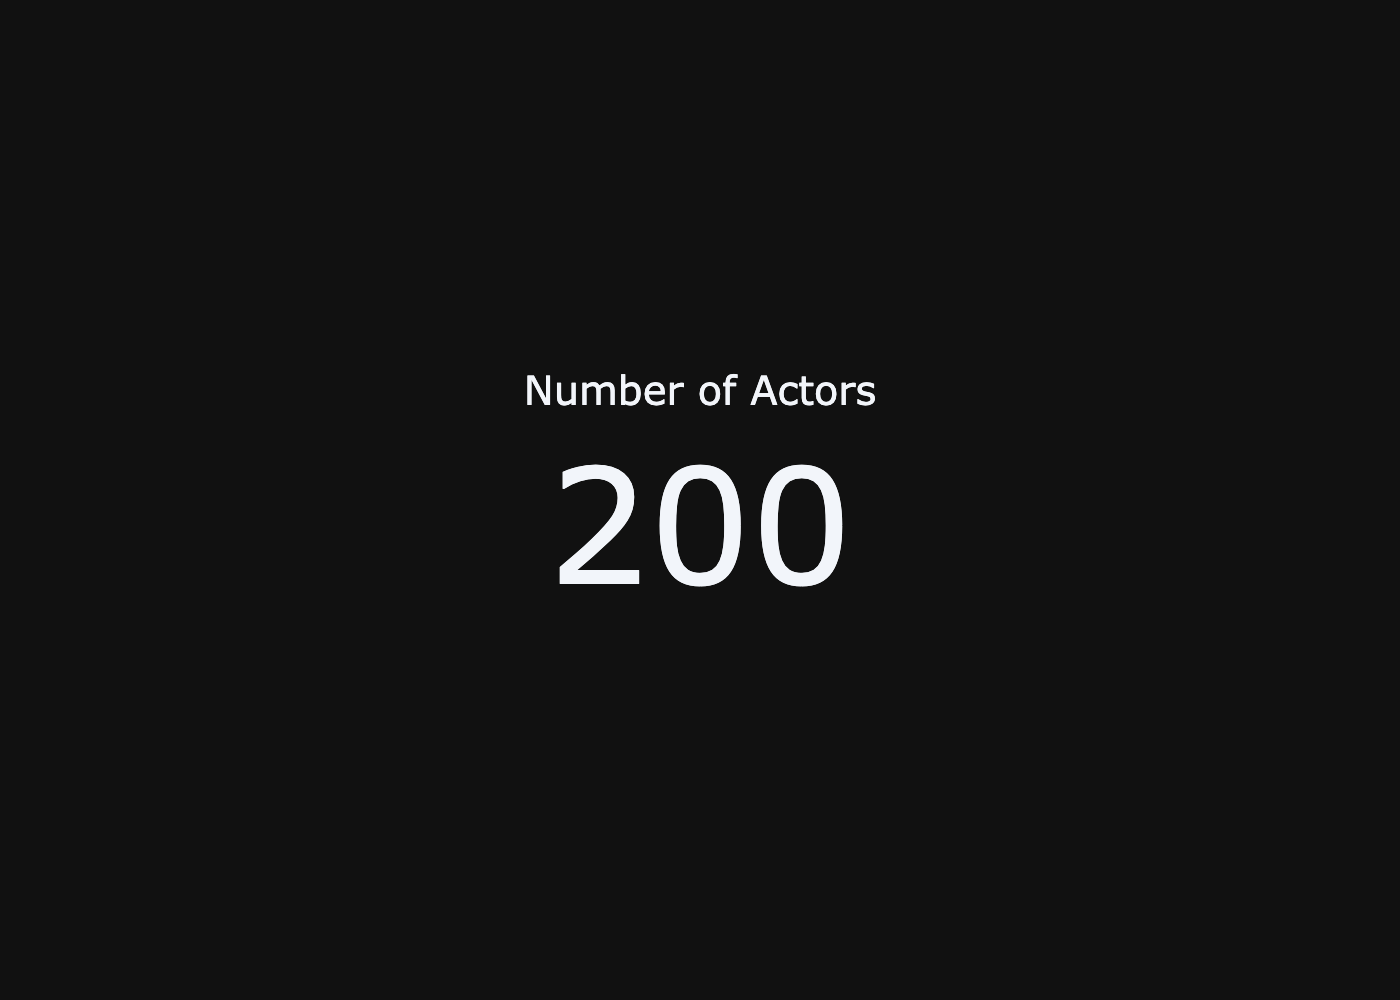

('SELECT COUNT(*) FROM actor;',
    count
 0    200,
 Figure({
     'data': [{'mode': 'number', 'title': {'text': 'Number of Actors'}, 'type': 'indicator', 'value': np.int64(200)}],
     'layout': {'template': '...'}
 }))

In [36]:
vn.ask("How many actors are there in the database?")

In [37]:
from vanna.flask import VannaFlaskApp
VannaFlaskApp(vn, allow_llm_to_see_data=True).run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: on


Number of requested results 10 is greater than number of elements in index 5, updating n_results = 5
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 5, updating n_results = 5
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
